## Importing necessary libraries

In [1]:
import requests 
import pandas as pd 
from bs4 import BeautifulSoup 
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

## Importing the Ugly Duckling story from this <a href="https://gutenberg.ca/ebooks/andersen-ugly/andersen-ugly-00-h.html">link</a> by using BeautifulSoup

In [2]:
def getdata(url): 
    r = requests.get(url) 
    return r.text 
  
htmldata = getdata("https://gutenberg.ca/ebooks/andersen-ugly/andersen-ugly-00-h.html") 
soup = BeautifulSoup(htmldata, 'html.parser') 

data = ""
results = ""

for data in soup.find_all("p"): 
    results += data.get_text()

## Notice that the introduction and footnote being imported

In [3]:
print(results)


* A Project Gutenberg Canada Ebook *

This ebook is made available at no cost and with very few
restrictions. These restrictions apply only if (1) you make
a change in the ebook (other than alteration for different
display devices), or (2) you are making commercial use of
the ebook. If either of these conditions applies, please
check 
gutenberg.ca/links/licence.html before proceeding.

This work is in the Canadian public domain, but may be under
copyright in some countries. If you live outside Canada, check your
country's copyright laws. If the book is under copyright
in your country, do not download or redistribute this file.

The Ugly Duckling was written by Hans Christian Andersen
(1805-1875), and was translated from the Danish by
M. R. James (1862-1936) as part of his
Hans Andersen Forty-Two Stories (1930).

This ebook was produced by: David T. Jones, Mark Akrigg
& the Online Distributed Proofreading Team
at http://www.pgdpcanada.net
It was very pleasant out in the country. It was

## Using .partition() method to remove the introduction & footnote

In [4]:
head, sep, tail = results.partition("\n[1]\nThis needs")

In [5]:
head

'\n* A Project Gutenberg Canada Ebook *\n\nThis ebook is made available at no cost and with very few\nrestrictions. These restrictions apply only if (1) you make\na change in the ebook (other than alteration for different\ndisplay devices), or (2) you are making commercial use of\nthe ebook. If either of these conditions applies, please\ncheck \ngutenberg.ca/links/licence.html before proceeding.\n\nThis work is in the Canadian public domain, but may be under\ncopyright in some countries. If you live outside Canada, check your\ncountry\'s copyright laws. If the book is under copyright\nin your country, do not download or redistribute this file.\n\nThe Ugly Duckling was written by Hans Christian Andersen\n(1805-1875), and was translated from the Danish by\nM. R. James (1862-1936) as part of his\nHans Andersen Forty-Two Stories (1930).\n\nThis ebook was produced by: David T. Jones, Mark Akrigg\n& the Online Distributed Proofreading Team\nat http://www.pgdpcanada.net\nIt was very pleasant 

In [6]:
head, sep, tail = head.partition("http://www.pgdpcanada.net")

## All cleared

In [7]:
print(tail)


It was very pleasant out in the country. It was summer time, the corn
was yellow, the oats green, the hay was stacked down in the green
meadows, and there the stork walked about on his long red legs and
talked Egyptian. He had learnt the language from his mother. Round the
fields and meadows there were large woods and within them deep lakes:
indeed, it was pleasant out in the country. Full in the sunshine, an
old manor house stood, surrounded by a deep moat, and from the base of
the walls right down to the water great dock plants grew--so tall that
a little child could stand upright under the largest of them. It was
as lonely in among them as in the thickest wood; and there a Duck was
sitting on her nest. She had got to hatch out her little Ducklings,
but by this time she was well nigh tired out, they took so long about
it, and she had very few callers. The other Ducks preferred swimming
about the moat to coming up and sitting under a dock-leaf to chat with
her.At last, one egg after 

## Checking how many words in the story

In [8]:
len(tail)

18906

## Create a Word Cloud object and then generate a Word Cloud. 

In [9]:
tail_wc = WordCloud(
    background_color = "white",
    max_words = 18906,
    stopwords = stopwords
)

tail_wc.generate(tail)

## Visualizing the Word Cloud
* The BIGGER the fonts are, the most appearances the words are

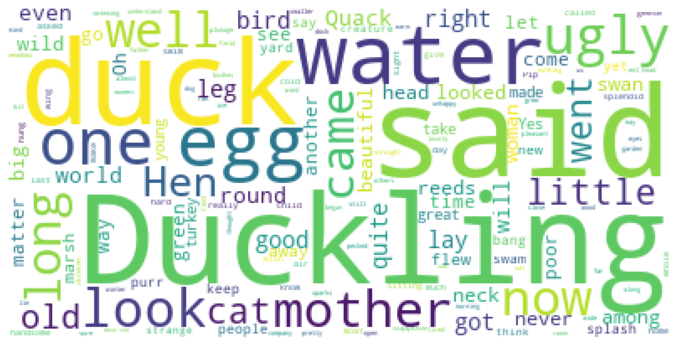

In [10]:
fig = plt.figure()
fig.set_figwidth(12)
fig.set_figheight(10)

plt.imshow(tail_wc, interpolation = "hermite")
plt.axis("off")
plt.show()

## The "said" appeared in the Word Cloud!
* "said" is not really an informative word, so add it to the stopwords and re-generate the Word Cloud

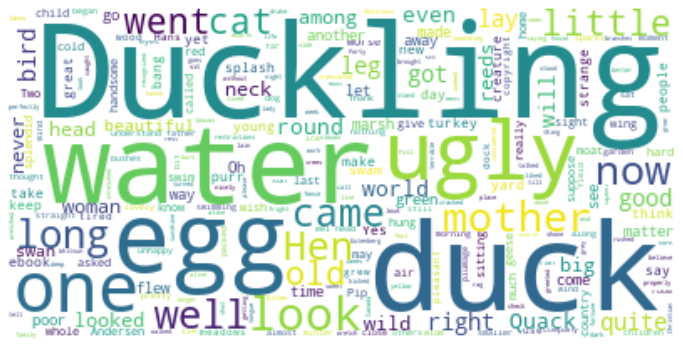

In [11]:
# Add the words said to stopwords
stopwords.add("said")

# Re-generate the word cloud
tail_wc.generate(results)

# Display the cloud
fig = plt.figure()
fig.set_figwidth(12)   # Set width
fig.set_figheight(12)  # Set height

plt.imshow(tail_wc, interpolation = "bilinear")
plt.axis("off")
plt.show()   

## Downloading a cute duckling pic from web and save as a mask

In [15]:
!wget --quiet http://www.clker.com/cliparts/F/g/x/h/b/x/ugly-duckling-hi.png
    
duckling_mask = np.array(Image.open("ugly-duckling-hi.png"))

## Displaying the duckling pic

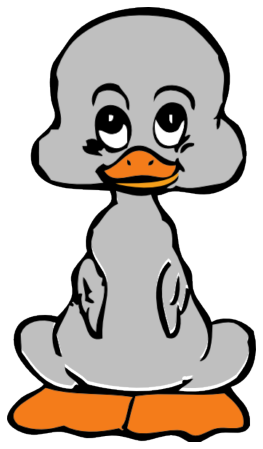

In [13]:
fig = plt.figure()
fig.set_figwidth(8)
fig.set_figheight(8)

plt.imshow(duckling_mask, cmap = plt.cm.gray, interpolation = "bilinear")
plt.axis("off")
plt.show()

## Generate the masked Word Cloud in duckling shape

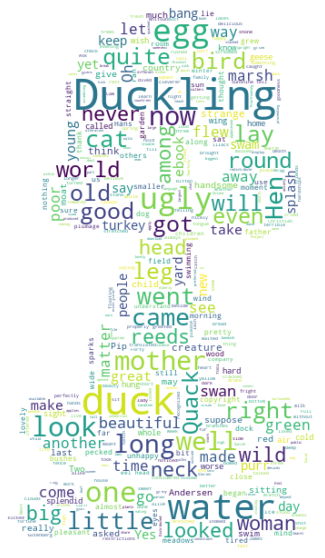

In [14]:
tail_wc = WordCloud(background_color = "white", max_words = 18906, mask = duckling_mask, stopwords = stopwords)

tail_wc.generate(results)

fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(10)

plt.imshow(tail_wc, interpolation = "bilinear")
plt.axis("off")
plt.show()